In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("retail_price.csv")

In [3]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [4]:
df = df[["product_id","product_category_name","total_price", "unit_price"]]

In [5]:
df.shape

(676, 4)

In [6]:
df.sample(4)

product_id  product_category_name  total_price  unit_price
23      garden5           garden_tools      1386.00   99.000000
157  computers5  computers_accessories       236.70   78.900000
568       cool1             cool_stuff       599.93   85.704286
66      health9          health_beauty       647.73   23.990000

In [7]:
# Extract the features (price) and target variable (sales)
X = df['unit_price'].values.reshape(-1, 1)
y = df['total_price'].values

In [8]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [9]:
# Make predictions using the model
y_pred = model.predict(X)

In [10]:
# Calculate evaluation metrics (RMSE and R-squared)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r_squared = r2_score(y, y_pred)

In [11]:
# Print the evaluation metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r_squared}')

Root Mean Squared Error (RMSE): 1550.2717882042834
R-squared: 0.16728214971723965


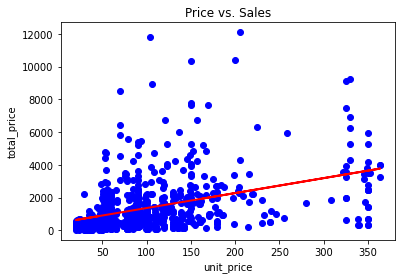

In [12]:
# Visualize the data and regression line
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('unit_price')
plt.ylabel('total_price')
plt.title('Price vs. Sales')
plt.show()

In [13]:
optimal_price_idx = np.argmax(y_pred)
optimal_price = X[optimal_price_idx][0]
print(f'Optimal Price Point for Maximizing Total_sales: {optimal_price:.2f}')

Optimal Price Point for Maximizing Total_sales: 364.00
